In [77]:
import pandas as pd 
import numpy as np 
from dtw import *
import gower
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("/home/nils/projects/research_project_frequency_analysis/lcs_analysis/5314-201703.encoded.csv")
df.columns = ["timestamps", "events"]



In [22]:
day1 = df[df.timestamps < df.timestamps[0] + pd.to_timedelta("1d").total_seconds()]
subset = df[df.timestamps < df.timestamps[0] + pd.to_timedelta("7d").total_seconds()]
subset

timestamps    events
0      1488322801  85f5c18b
1      1488322801  85f5c18b
2      1488322802  70083fd2
3      1488322861  85f5c18b
4      1488322861  276ebc63
...           ...       ...
12364  1488927270  760c5208
12365  1488927270  bba3d47c
12366  1488927271  f9cfa0b9
12367  1488927271  ed9738ca
12368  1488927301  85f5c18b

[12369 rows x 2 columns]

In [89]:
dtm = gower.gower_matrix(subset[["events"]])


In [90]:
dist = dtm[:, :len(day1)]
dist

array([[0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.]], dtype=float32)

In [92]:
np.any(dist == 0.5)

False

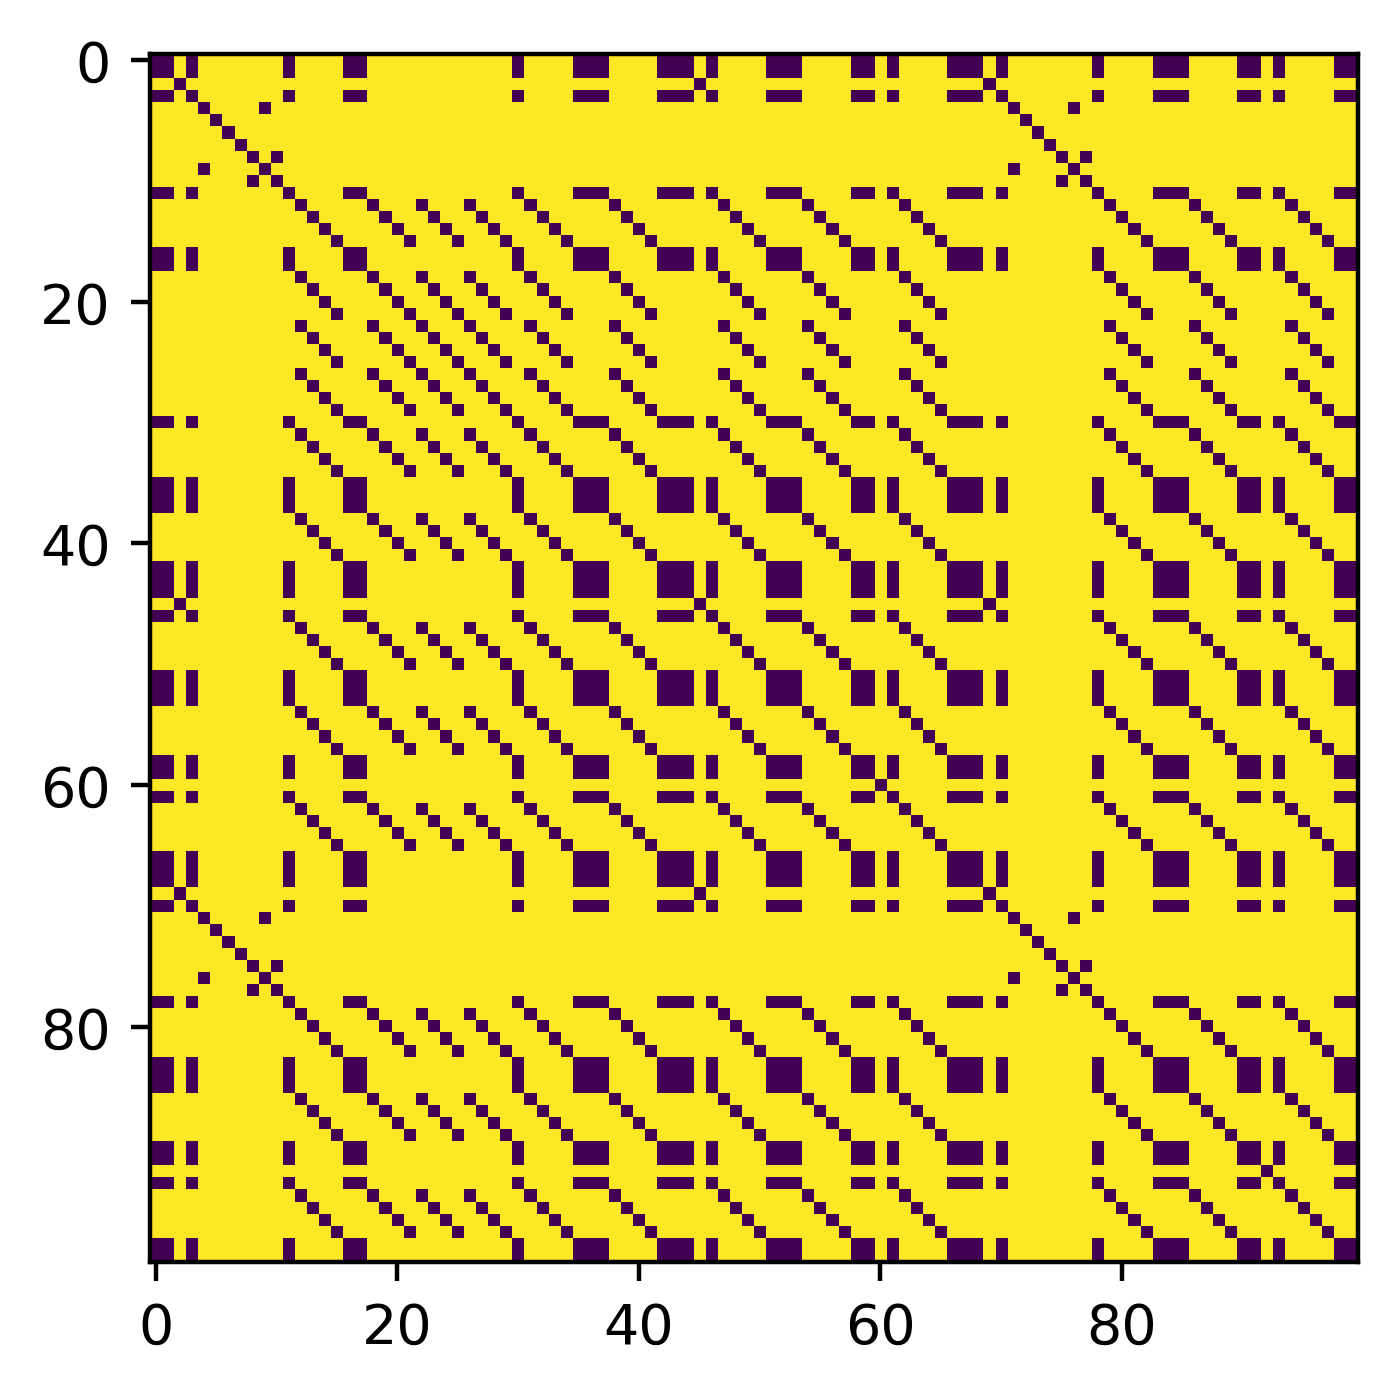

In [94]:
plt.figure(dpi=400)
plt.imshow(dist[:100, :100])

In [107]:
df_min = pd.DataFrame(pd.to_datetime(df.timestamps, unit='s').map(lambda x: float(x.minute)))
df_min

timestamps
0             0.0
1             0.0
2             0.0
3             1.0
4             1.0
...           ...
52447        55.0
52448        59.0
52449        59.0
52450        59.0
52451        59.0

[52452 rows x 1 columns]

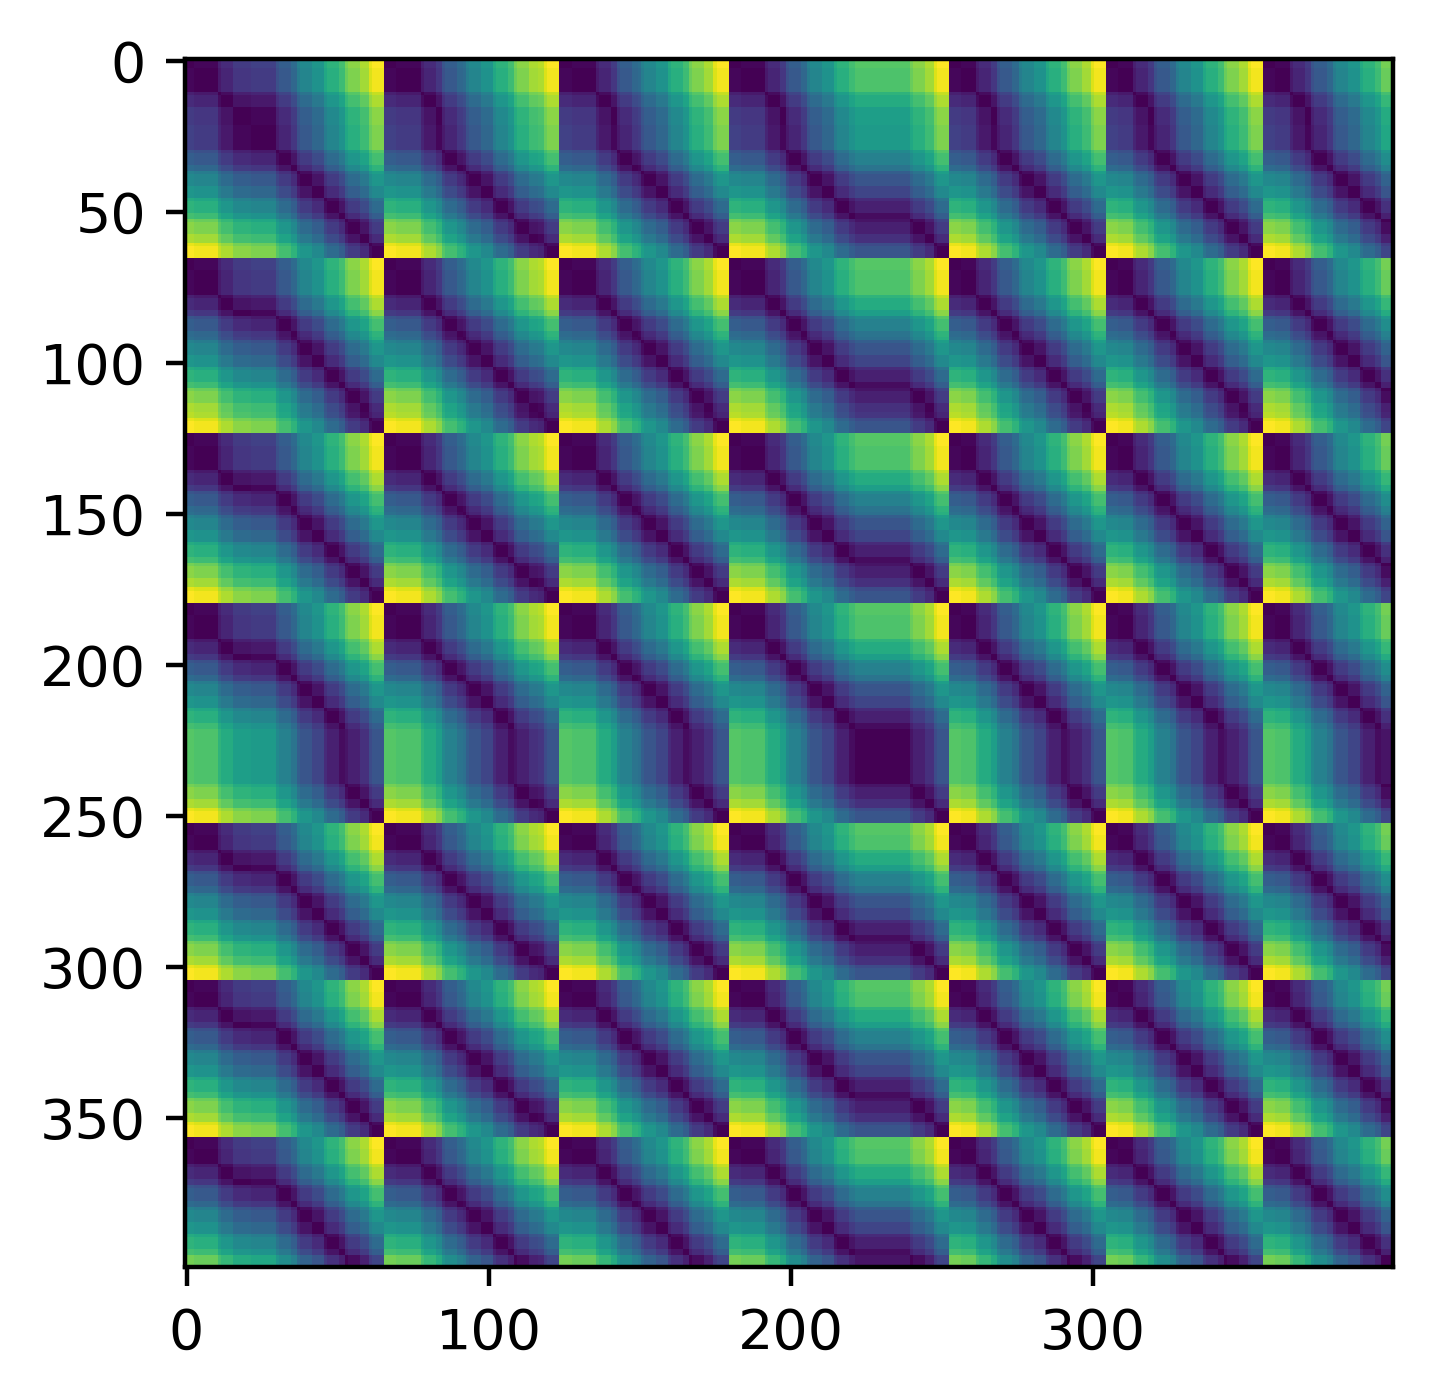

In [111]:
dtm = gower.gower_matrix(df_min[:400])
plt.figure(dpi=400)
plt.imshow(dtm)

In [75]:
alignment = dtw(dist.astype("double"))

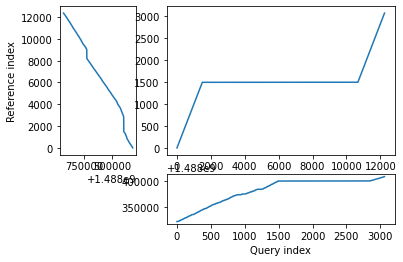

<AxesSubplot:>

In [76]:
dtwPlotThreeWay(alignment, day1.timestamps, subset.timestamps)

In [28]:
test_ds = pd.concat([day1] * 5).reset_index()

In [29]:
test_ds

index  timestamps    events
0          0  1488322801  85f5c18b
1          1  1488322801  85f5c18b
2          2  1488322802  70083fd2
3          3  1488322861  85f5c18b
4          4  1488322861  276ebc63
...      ...         ...       ...
15305   3057  1488409056  bba3d47c
15306   3058  1488409056  f9cfa0b9
15307   3059  1488409056  ed9738ca
15308   3060  1488409088  23666bbc
15309   3061  1488409178  23666bbc

[15310 rows x 3 columns]

In [30]:
test_ds.timestamps[:-1].reset_index()

index  timestamps
0          0  1488322801
1          1  1488322801
2          2  1488322802
3          3  1488322861
4          4  1488322861
...      ...         ...
15304  15304  1488409056
15305  15305  1488409056
15306  15306  1488409056
15307  15307  1488409056
15308  15308  1488409088

[15309 rows x 2 columns]

In [11]:
test_ds.timestamps[1:].reset_index()

index  timestamps
0          1  1488322801
1          2  1488322802
2          3  1488322861
3          4  1488322861
4          5  1488322861
...      ...         ...
15304  15305  1488409056
15305  15306  1488409056
15306  15307  1488409056
15307  15308  1488409088
15308  15309  1488409178

[15309 rows x 2 columns]

In [12]:
delta_ts = (-test_ds.timestamps[:].reset_index() + test_ds.timestamps[1:].reset_index()).timestamps[:-1]
delta_ts

0         0.0
1         1.0
2        59.0
3         0.0
4         0.0
         ... 
15304     0.0
15305     0.0
15306     0.0
15307    32.0
15308    90.0
Name: timestamps, Length: 15309, dtype: float64

In [54]:
test_dtm = gower.gower_matrix(test_ds[:10])
test_dtm
dist = test_dtm[:, :4]
dist

array([[0.        , 0.03703704, 0.4074074 , 0.11111111],
       [0.03703704, 0.        , 0.37037036, 0.07407407],
       [0.4074074 , 0.37037036, 0.        , 0.37037036],
       [0.11111111, 0.07407407, 0.37037036, 0.        ],
       [0.4814815 , 0.44444445, 0.4074074 , 0.37037036],
       [0.5185185 , 0.4814815 , 0.44444445, 0.4074074 ],
       [0.5555556 , 0.5185185 , 0.4814815 , 0.44444445],
       [0.5925926 , 0.5555556 , 0.5185185 , 0.4814815 ],
       [0.6296296 , 0.5925926 , 0.5555556 , 0.5185185 ],
       [0.6666667 , 0.6296296 , 0.5925926 , 0.5555556 ]], dtype=float32)

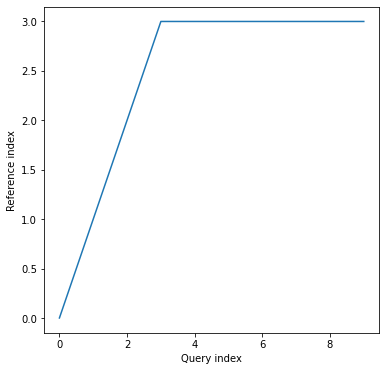

2.7777777910232544


3.6666665

In [55]:
alignment = dtw(dist.astype("double"))
alignment.plot()
print(alignment.distance)
dist[2:, 1].sum()

In [16]:
dtm[:5*len(day1)]

array([[0.        , 0.        , 0.50000083, ..., 0.9999384 , 0.9999384 ,
        0.49996322],
       [0.        , 0.        , 0.50000083, ..., 0.9999384 , 0.9999384 ,
        0.49996322],
       [0.50000083, 0.50000083, 0.        , ..., 0.9999376 , 0.9999376 ,
        0.9999624 ],
       ...,
       [0.9999384 , 0.9999384 , 0.9999376 , ..., 0.        , 0.5       ,
        0.5000248 ],
       [0.9999384 , 0.9999384 , 0.9999376 , ..., 0.5       , 0.        ,
        0.5000248 ],
       [0.49996322, 0.49996322, 0.9999624 , ..., 0.5000248 , 0.5000248 ,
        0.        ]], dtype=float32)

In [3]:
df["timestamp_str"] = pd.to_datetime(df.timestamps, unit="s")
delta_ts = (-df.timestamps[:].reset_index() + df.timestamps[1:].reset_index()).timestamps[:-1]
df["delta_ts"] = delta_ts
df

timestamps    events       timestamp_str  delta_ts
0      1488322801  85f5c18b 2017-02-28 23:00:01       0.0
1      1488322801  85f5c18b 2017-02-28 23:00:01       1.0
2      1488322802  70083fd2 2017-02-28 23:00:02      59.0
3      1488322861  85f5c18b 2017-02-28 23:01:01       0.0
4      1488322861  276ebc63 2017-02-28 23:01:01       0.0
...           ...       ...                 ...       ...
52447  1490997301  85f5c18b 2017-03-31 21:55:01     272.0
52448  1490997573  760c5208 2017-03-31 21:59:33       0.0
52449  1490997573  bba3d47c 2017-03-31 21:59:33       0.0
52450  1490997573  f9cfa0b9 2017-03-31 21:59:33       0.0
52451  1490997573  ed9738ca 2017-03-31 21:59:33       NaN

[52452 rows x 4 columns]

In [4]:
days = pd.to_datetime(df.timestamp_str[0].date()) + pd.to_timedelta(np.arange(32), unit="d")

In [5]:
df_days = [e[1] for e in df.groupby(df.timestamp_str.map(lambda x: x.day))]

In [6]:
all_dtm = gower.gower_matrix(df)

In [9]:
for query_d in df_days:
    dist = all_dtm[:, query_d.index]
    alignment = dtw(np.ascontiguousarray(dist, dtype=np.float64))
    dtwPlotThreeWay(alignment, day1.timestamps, test_ds.timestamps)
    alignment.plot()

ValueError: No warping path found compatible with the local constraints

In [ ]:
np.save("gower_dtm", all_dtm)

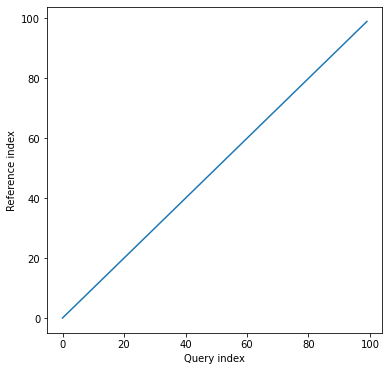

<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

In [18]:
dist = gower.gower_matrix(df[:100])[:, :100]
alignment = dtw(dist.astype("float64"))
alignment.plot()

In [19]:
test_ds

NameError: name 'test_ds' is not defined